## OVERVIEW

Microsoft is venturing into the film industry by establishing a new movie studio. With limited knowledge about creating movies, Microsoft aims to gain insights into the types of films that are currently succeeding at the box office. By analyzing the prevailing trends and success factors in the film industry, Microsoft aims to make informed decisions that will guide their film creation process. This exploration is crucial for Microsoft to thrive in the highly competitive market by aligning their strategies with the evolving landscape of the film industry.

## PROBLEM STATEMENT
Microsoft's new movie studio lacks the necessary knowledge and understanding of the film industry to make informed decisions about the types of films to create. This knowledge gap hinders their ability to compete with established companies in producing successful and engaging original content. There is a need for actionable insights into current box office trends and success factors to guide Microsoft's decision-making process and ensure their success in the highly competitive film market.

## MAIN OBJECTIVE
The main objective is to provide Microsoft's new movie studio with actionable insights into current box office trends and success factors in the film industry, enabling them to make informed decisions about the types of films to create and compete effectively with other established companies producing original video content.

## SPECIFIC OBJECTIVES
1. Which studio produces the highest grossing movies. 
2. Find the average runtime of movies and what would be the reccomended runtime for movies to be produces in the studio.
3. What is the relationship between the movie budget and the gross income generated?
4. How does the original language of a film affect its popularity.
5. Find the genres with the higest and loest raatings.

### OBJECTIVE 1: Which studio produces the highest grossing movies. 

In [30]:
#imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Loading the 'bom.movie_gross.csv.gz' dataset for Gross analysis

In [31]:
bom_movie_df = pd.read_csv('bom.movie_gross.csv.gz')
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Understanding the dataset better

In [32]:
bom_movie_df.shape

(3387, 5)

In [33]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## DATA CLEANING

### CHECKING AND DELETING DUPLICATES

In [34]:
bom_movie_df.duplicated().sum()

0

Found that there are no duplicate cells

### DROPPING OF NULL VALLUES IN OUR DATASET

From the information (.info()) of our dataset we have some few null values from studio, domestic_gross and foreign_gross columns. 
The amount of null values are minimal hence to be dropped as it won't affect our sample dataset

In [35]:
bom_movie_df.dropna(subset=['studio','domestic_gross','foreign_gross'], inplace=True)
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


Changed the datatypes of foreign_gross for uniformity with domestic_gross

In [38]:
bom_movie_df['foreign_gross'] = pd.to_numeric(bom_movie_df['foreign_gross'], errors='coerce')
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


Creating a new column (Total_gross) which will be by adding domestic_gross and foreign_gross

In [39]:
bom_movie_df['Total_gross'] = bom_movie_df['domestic_gross'] + bom_movie_df['foreign_gross']
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [40]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            2007 non-null   int64  
 5   Total_gross     2002 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.8+ KB


In [41]:
bom_movie_df.describe()

,domestic_gross,foreign_gross,year,Total_gross
count,2.007000e+03,2.002000e+03,2007.000000,2.002000e+03
mean,4.701984e+07,7.597967e+07,2013.506228,1.216950e+08
std,8.162689e+07,1.383001e+08,2.597997,2.062245e+08
min,4.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,6.700000e+05,4.000000e+06,2011.000000,8.155750e+06
50%,1.670000e+07,1.960000e+07,2013.000000,4.220000e+07
75%,5.605000e+07,7.645000e+07,2016.000000,1.327750e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [43]:
# grouping the dataset by the studio, and calculate the mean of the total income for the films produced
columns = ['studio', 'Total_gross']
bom_movie_df = bom_movie_df.groupby('studio')['Total_gross'].mean()
bom_movie_df = bom_movie_df.reset_index()
bom_movie_df

,studio,Total_gross
0,3D,1.600000e+07
1,A24,2.625889e+07
2,AF,2.327500e+06
3,AGF,1.768000e+05
4,AR,5.805000e+07
...,...,...
167,WOW,4.940000e+04
168,Wein.,5.936091e+07
169,Yash,4.920575e+07
170,Zee,1.671000e+06


In [45]:
# sorting the sum of the total gross income from the largest gross
bom_movie_df = bom_movie_df.sort_values('Total_gross', ascending=False)
# select the top 15 studios
bom_df1 =bom_movie_df.head(15)

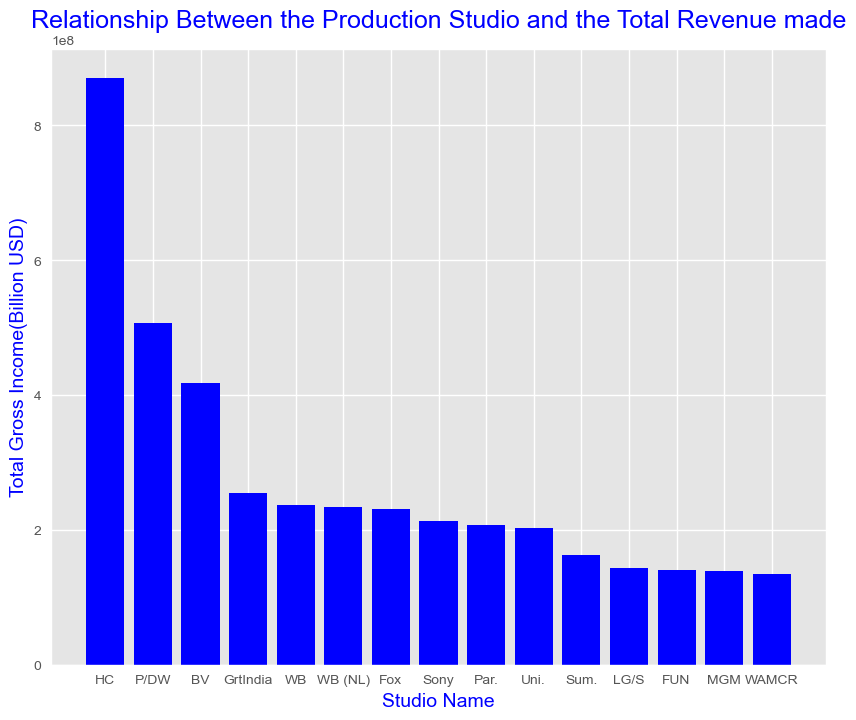

In [49]:
# plotting a barplot for the top 15 films in box office movies and the studio of production
fig, ax = plt.subplots(figsize=(10,8))

plt.style.use('ggplot')
plt.bar( x= bom_df1['studio'], height= bom_df1['Total_gross'], color = 'blue')

plt.xlabel('Studio Name',color = 'blue', fontsize=14)
plt.ylabel('Total Gross Income(Billion USD)',color = 'blue', fontsize=14)
plt.title('Relationship Between the Production Studio and the Total Revenue made', color = 'blue', fontsize=18)
plt.show()

From the above plot we can see that the top 5 five studios are HC, P/DW, BV, GrtIndia, and WB.

### OBJECTIVE 2: Find the average runtime of movies and what would be the reccomended runtime for movies to be produces in the studio.

In [80]:
movie_info_df = pd.read_csv('rt.movie_info.tsv.gz', delimiter = '\t')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [81]:
#checking how our dataset looks like
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


From the information above we can see that the runtime column has some 30 missing values which is not big to affect our dataset after replacing the null values with '0'.
It can also be seen that datatype is a string and needs to be changed to a numerical value so as to cater for mathematical computations


In [82]:
#REMOVE THE WORD MINUTES from the runtime column

movie_info_df['runtime'] = movie_info_df['runtime'].str.replace('minutes', '')
movie_info_df.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN


In [83]:
#Replacing the null values in runtime column with 0
movie_info_df['runtime']= movie_info_df['runtime'].fillna(0)
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1560 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [84]:
#converting the result to number values that will be recognized by the computer for computation.
# use a .describe() method to get the mean and percentiles of our interest.

movie_info_df['runtime']= pd.to_numeric(movie_info_df.runtime,errors="coerce")
movie_info_df['runtime'].describe()

count    1560.000000
mean      101.968590
std        28.276622
min         0.000000
25%        90.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime, dtype: float64

In [86]:
#finding the average length of a movie
movie_info_df['runtime'].mean()

101.96858974358975

Based on the analysis conducted, it can be concluded that the average movie length is approximately 101 minutes, ranging from a minimum of 5 minutes to a maximum of 358 minutes. The decision to use the 75th percentile as the average is based on the preference for longer movies, taking into consideration the potential influence of shorter films on the mean calculation. This choice is supported by personal intuition and experience with movie viewing, as longer movies are generally perceived as more engaging and fulfilling compared to shorter ones.